In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from dateutil import parser
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [113]:
df = pd.read_json('data.json', lines=True)

In [114]:
df1 = pd.concat([pd.DataFrame(x) for x in df['custom_fields']], keys=df.index).reset_index(level=1,drop=True)
df = df.drop('custom_fields', axis=1).join(df1, rsuffix='_custom_field').reset_index(drop=True)
df.head()

,assignee,completed,completed_at,created_at,gid,id,memberships,name,notes,parent,...,enum_value,gid_custom_field,id_custom_field,name_custom_field,number_value,precision,resource_subtype,resource_type,text_value,type
0,None,False,NaT,2018-07-02 21:03:24.112,730452261753984,730452261753984,[{}],P0:,,None,...,NaN,207648931279186,207648931279186,Estimate,NaN,0.0,number,custom_field,NaN,number
1,None,False,NaT,2018-07-02 21:03:24.112,730452261753984,730452261753984,[{}],P0:,,None,...,NaN,326509860716922,326509860716922,Time spent,NaN,1.0,number,custom_field,NaN,number
2,None,False,NaT,2018-07-02 21:03:24.112,730452261753984,730452261753984,[{}],P0:,,None,...,NaN,833194452969144,833194452969144,PrioridadeINT,NaN,NaN,enum,custom_field,NaN,enum
3,None,False,NaT,2018-07-02 21:03:24.112,730452261753984,730452261753984,[{}],P0:,,None,...,NaN,833331487176046,833331487176046,Motivo de Subida de Prioridade,NaN,NaN,text,custom_field,NaN,text
4,"{'id': 421257675580403, 'gid': '42125767558040...",True,2018-10-19 19:22:16.621,2018-10-17 12:37:55.024,820637064816196,820637064816196,"[{}, {}]",[P0][apoioentrega] Busca trava no firefox,Atenção: Salve tudo antes pois há chance do se...,"{'id': 684409696069679, 'gid': '68440969606967...",...,NaN,207648931279186,207648931279186,Estimate,NaN,0.0,number,custom_field,NaN,number


In [118]:
df.tail(1).to_dict()

{'assignee': {3369: {'id': 373271862741082,
   'gid': '373271862741082',
   'resource_type': 'user'}},
 'completed': {3369: True},
 'completed_at': {3369: Timestamp('2019-01-17 17:43:17.634000')},
 'created_at': {3369: Timestamp('2019-01-14 12:04:24.669000')},
 'gid': {3369: 981015655871021},
 'id': {3369: 981015655871021},
 'memberships': {3369: [{}, {}]},
 'name': {3369: '[hering-v5][Busca] Novo Endpoint por API não responde como o antigo'},
 'notes': {3369: 'O que está acontecendo?\nPor gentileza, o endpoint api.linximpulse não responde como o endpoint antigo loja.neemu.com, é preciso fazer alguma configuração adicional (ou as consultas estão erradas)?\n\nO que deveria acontecer?\nDeveriam responder da mesma forma (mudando apenas os links/applylinks para o novo formato)\n\nComo reproduzir?\n/search\nEndpoint antigo:\nhttp://hering-v5.neemu.com/searchapi/v3/search?apikey=hering-v5&secretkey=sP1OFhFy4wU4Ad8RueI9SQ==&terms=camiseta\n\nNovo:\nhttps://api.linximpulse.com/engage/search/v3

In [89]:
df.columns

Index(['assignee', 'assignee_status', 'completed', 'completed_at',
       'created_at', 'due_at', 'due_on', 'followers', 'gid', 'hearted',
       'hearts', 'id', 'liked', 'likes', 'memberships', 'modified_at', 'name',
       'notes', 'num_hearts', 'num_likes', 'parent', 'projects',
       'resource_subtype', 'resource_type', 'start_on', 'tags', 'workspace',
       'enabled', 'enum_options', 'enum_value', 'gid_custom_field',
       'id_custom_field', 'name_custom_field', 'number_value', 'precision',
       'resource_subtype_custom_field', 'resource_type_custom_field',
       'text_value', 'type'],
      dtype='object')

In [90]:
df['number_of_subtasks'] = df.subtasks.apply(lambda subtask: len(subtask))
df['number_value'] = df['number_value'].fillna(value=0)

AttributeError: 'DataFrame' object has no attribute 'subtasks'

In [91]:
dates = df[['completed_at', 'created_at', 'number_of_subtasks', 'gid']]
dates = dates.dropna(axis=0)

KeyError: "['number_of_subtasks'] not in index"

In [ ]:
dates.completed_at = dates.completed_at.apply(lambda date: parser.parse(str(date)).timestamp())
dates.created_at = dates.created_at.apply(lambda date: parser.parse(str(date)).timestamp())

In [92]:
dates['date_diff'] = dates.completed_at - dates.created_at

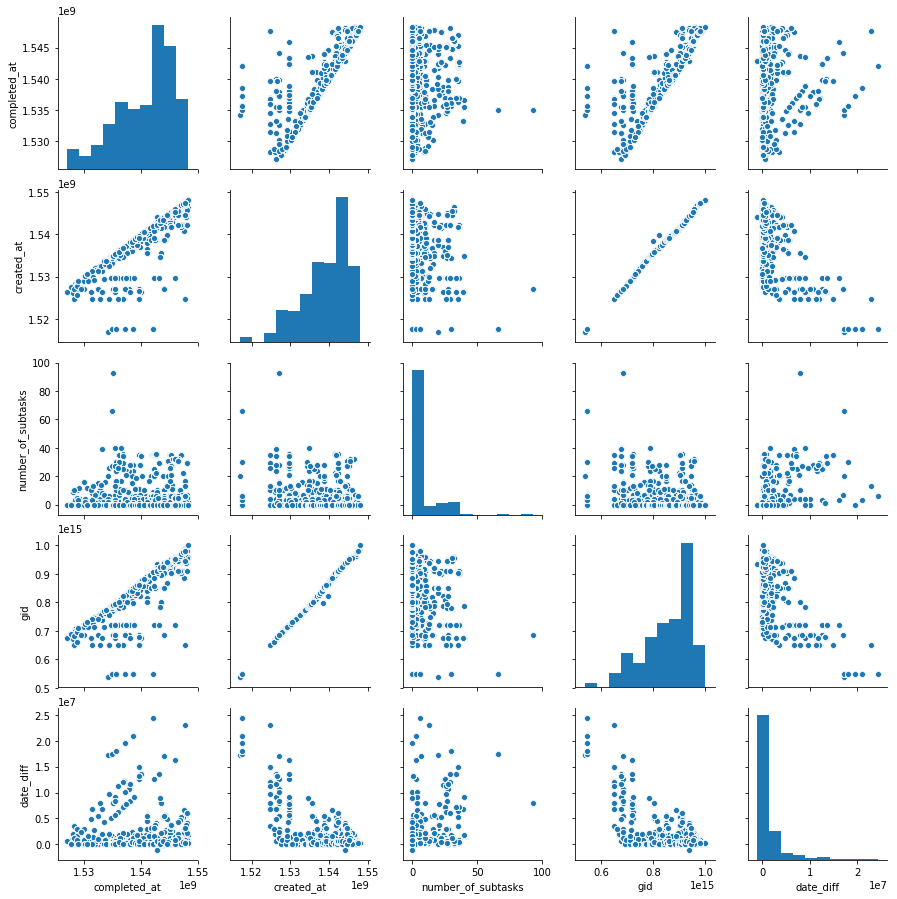

In [93]:
sns.pairplot(dates)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


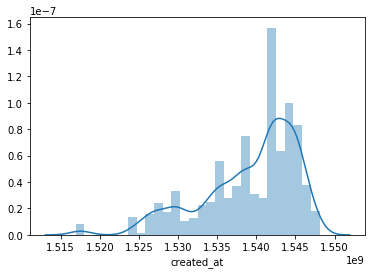

In [94]:
sns.distplot(dates.created_at)

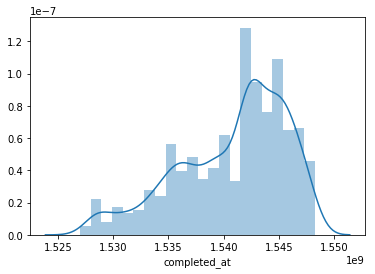

In [95]:
sns.distplot(dates.completed_at)

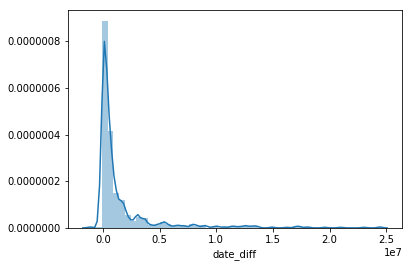

In [96]:
sns.distplot(dates.date_diff)

In [97]:
dates.corr()

,completed_at,created_at,number_of_subtasks,gid,date_diff
completed_at,1.000000,0.844906,-0.008318,0.852838,-0.065580
created_at,0.844906,1.000000,-0.192725,0.998437,-0.589172
number_of_subtasks,-0.008318,-0.192725,1.000000,-0.183860,0.346951
gid,0.852838,0.998437,-0.183860,1.000000,-0.574275
date_diff,-0.065580,-0.589172,0.346951,-0.574275,1.000000


In [98]:
dates.head()

,completed_at,created_at,number_of_subtasks,gid,date_diff
4,1.539977e+09,1.539780e+09,4,820637064816196,197061.597
5,1.539977e+09,1.539780e+09,4,820637064816196,197061.597
6,1.539977e+09,1.539780e+09,4,820637064816196,197061.597
7,1.539977e+09,1.539780e+09,4,820637064816196,197061.597
8,1.539977e+09,1.539780e+09,4,820637064816196,197061.597


In [99]:
X = dates[['date_diff']]
Y = dates[['number_of_subtasks']]

In [100]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.4, random_state=101)

In [101]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
predictions = lm.predict(x_test)

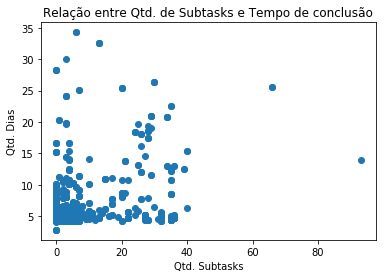

In [103]:
plt.scatter(y_test,predictions)
plt.title("Relação entre Qtd. de Subtasks e Tempo de conclusão")
plt.xlabel("Qtd. Subtasks")
plt.ylabel("Qtd. Dias")
plt.show()

In [104]:
time_spent_df = df[df.name_custom_field == 'Time spent'].copy()
time_spent_df[['number_value']] = time_spent_df[['number_value']].fillna(value=0)
time_spent_df['number_of_subtasks'] = time_spent_df.subtasks.apply(lambda subtask: len(subtask))

AttributeError: 'DataFrame' object has no attribute 'subtasks'

In [ ]:
X = time_spent_df[['number_value']]
Y = time_spent_df[['number_of_subtasks']]

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.4, random_state=101)

lm = LinearRegression()
lm.fit(x_train,y_train)

predictions = lm.predict(x_test)

plt.scatter(y_test,predictions)
plt.suptitle("Relação entre Qtd. de Subtasks e Tempo de conclusão")
plt.xlabel("Qtd. Subtasks")
plt.ylabel("Timespent")
plt.show()

In [ ]:
client_df = df[df.name.str.contains('apoioentrega') & df.name_custom_field.str.contains('Time spent')]
client_df.number_value.sum(axis=0)

In [105]:
product_per_client = df[df.name.str.contains('apoioentrega') & df.name_custom_field.str.contains('Time spent')]

df1 = pd.concat([pd.DataFrame(x) for x in product_per_client['tags']], keys=product_per_client.index).reset_index(level=1,drop=True)
product_per_client = product_per_client.drop('tags', axis=1).join(df1, rsuffix='_tag').reset_index(drop=True)

product_per_client[['gid_tag', 'id_tag', 'resource_type_tag']]
df1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,color,created_at,followers,gid,id,name,notes,resource_type,workspace
5,light-orange,2014-12-11T01:34:28.795Z,"[{'id': 107120529488849, 'gid': '1071205294888...",22125825955790,2.212583e+13,INT,,tag,"{'id': 2653227806782, 'gid': '2653227806782', ..."
5,dark-red,2016-02-04T16:46:09.837Z,[],87446544551399,8.744654e+13,CC:Busca,,tag,"{'id': 2653227806782, 'gid': '2653227806782', ..."
10,light-orange,2014-12-11T01:34:28.795Z,"[{'id': 107120529488849, 'gid': '1071205294888...",22125825955790,2.212583e+13,INT,,tag,"{'id': 2653227806782, 'gid': '2653227806782', ..."
10,dark-red,2016-02-04T16:46:09.837Z,[],87446544551399,8.744654e+13,CC:Busca,,tag,"{'id': 2653227806782, 'gid': '2653227806782', ..."
10,None,2017-03-30T17:37:43.905Z,[],307257740766735,3.072577e+14,rework,,tag,"{'id': 2653227806782, 'gid': '2653227806782', ..."
19,light-orange,2014-12-11T01:34:28.795Z,"[{'id': 107120529488849, 'gid': '1071205294888...",22125825955790,2.212583e+13,INT,,tag,"{'id': 2653227806782, 'gid': '2653227806782', ..."
19,dark-red,2016-02-04T16:46:09.837Z,[],87446544551399,8.744654e+13,CC:Busca,,tag,"{'id': 2653227806782, 'gid': '2653227806782', ..."
19,None,2017-03-30T17:37:43.905Z,[],307257740766735,3.072577e+14,rework,,tag,"{'id': 2653227806782, 'gid': '2653227806782', ..."
32,light-orange,2014-12-11T01:34:28.795Z,"[{'id': 107120529488849, 'gid': '1071205294888...",22125825955790,2.212583e+13,INT,,tag,"{'id': 2653227806782, 'gid': '2653227806782', ..."
32,dark-red,2016-02-04T16:46:09.837Z,[],87446544551399,8.744654e+13,CC:Busca,,tag,"{'id': 2653227806782, 'gid': '2653227806782', ..."


In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)

X = np.array(time_spent_df['number_value']).reshape(-1, 1)
Y = np.array(dates['number_of_subtasks']).reshape(-1, 1)

rf = regr.fit(X, Y)
rf.predict(Y)
